# Task 1 - LULC tile location map

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

**UPDATE THIS LINK** https://github.com/Sujan-Bhattarai12/eds220-hwk-4

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a simple map showing the location of the LULC tile section we used in the previous discussion section relative to the state of California and Mount Whitney. 

## About the data

In this task you will use two datsets:

**First dataset**

A small section of the GAP/LANDFIRE National Terrestrial Ecosystems data for 2011, from the US Geological Survey (USGS). This is a raster file with a 30 m x 30 m pixel resolution. Each cell in the raster has a number representing the type of land cover.

The data was pre-processed in the Microsoft Planetary Computer to show a small region around Mount Whitney in California.

Further information about the dataset can be accessed via the the dataset’s Digital Object Identifier (DOI) link:

U.S. Geological Survey (USGS) Gap Analysis Project (GAP), 2016, GAP/LANDFIRE National Terrestrial Ecosystems 2011: U.S. Geological Survey data release, https://doi.org/10.5066/F7ZS2TM0.

**Second dataset**

A shapefile of CA Geographic Boundaries. 
This is a subset of the US Census Bureau's 2016 TIGER database, which only has the state boundary.
[https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b](https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b)

## File management
All your data files must be  inside a directory named 'data'  **in your gitignore**. 

## Data access
The .tif file (same as we used in discussion section) is in the Canvas-week7-homework zip file. The California shapefile will be directly accessed via its URL.

## FINAL CODE
You will use the next cell at the end of the task. Leave it blank for now.

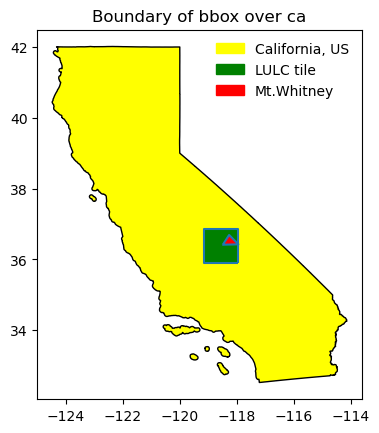

In [13]:
### ===== FINAL CODE =====
##change the directory: i messed up the github cloning,so I am changing

# import libraries and functions here
import os
import numpy as np

import geopandas as gpd
import xarray as xr
import rioxarray as rioxr

from shapely import Point
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import numpy as np
import matplotlib.patches as mpatches
from shapely.geometry import box

os.chdir("/Users/sujan/HW/eds220-hwk-4/")
data_path = os.path.join(os.getcwd(), 'data', 'land_cover.tif') #HW/eds220-hwk-4/data/homework4_files/data/land_cover.tif

##read the land-cover data
lulc =  rioxr.open_rasterio(data_path)

## reproject data 
lulc = lulc.rio.reproject('EPSG:4326')

# CA shapefile from the link 
ca = gpd.read_file("https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b/download/ca-state-boundary.zip")

##change the CRS to local system
ca = ca.to_crs("4326")

#bbox_duplicate = gpd.GeoDataFrame(geometry = lulc)


# Get the spatial extent
four_corners = lulc.rio.bounds()

# Create a bounding box geometry
bbox = box(four_corners[0], four_corners[1], four_corners[2], four_corners[3])

# Create a GeoDataFrame with the bounding box geometry
bbox = gpd.GeoDataFrame(geometry=[bbox], crs=lulc.rio.crs)

#points for mt.whitney
points = [[
            -118.50281779614944,
            36.43360285745764
          ],
          [
            -118.28329089019617,
            36.70565730462087
          ],
          [
            -117.95798369376611,
            36.44071397807059
          ],
          [
            -118.50297179600572,
            36.43046331863859
          ]]

#project the whitney
mt_whitney = gpd.GeoDataFrame(geometry = [Polygon(points)], crs = 'epsg:4326')

# Plot the geometries from ca
ax = ca.plot(edgecolor='black', facecolor='yellow')
ca_patch = mpatches.Patch(color = 'yellow',
                          label = 'California, US')

# Overlay the bbox boundary on the same plot
bbox.boundary.plot(ax=ax, facecolor = 'green')
bbox_patch = mpatches.Patch(color  = "green",
                            label = 'LULC tile')

mt_whitney.boundary.plot(ax = ax, facecolor = "red")
mt_patch = mpatches.Patch(color = "red",
                          label = "Mt.Whitney")

# Set plot title and show the plot
plt.title("Boundary of bbox over ca")
ax.legend(handles = [ca_patch, bbox_patch, mt_patch], frameon=False, loc='upper right')

plt.show()

## Import libraries and functions

In [2]:
# import libraries and functions here
import os
import numpy as np

import geopandas as gpd
import xarray as xr
import rioxarray as rioxr

from shapely import Point
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import numpy as np
import matplotlib.patches as mpatches

## Import data
Use the next two cells to:

1. Import the raster file and store it in a variable `lulc` and take a look at it.
2. Import the CA shapefile directly from the URL using `gpd.read_file()` and take a look at it. You can get it by right-clicking on the "Download" button. Store it as a variable named `ca`.

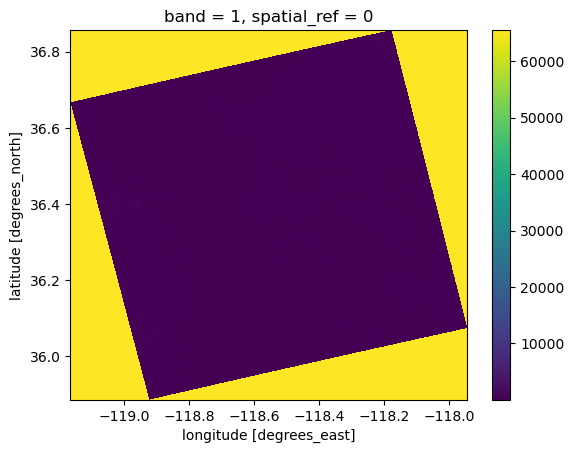

In [3]:
##change the directory: i messed up the github cloning,so I am changing
## directory to the baseform 

os.chdir("/Users/sujan/HW/eds220-hwk-4/")
data_path = os.path.join(os.getcwd(), 'data', 'land_cover.tif') #HW/eds220-hwk-4/data/homework4_files/data/land_cover.tif

##read the land-cover data
lulc =  rioxr.open_rasterio(data_path)

##Just plot it baby
lulc = lulc.rio.reproject('EPSG:4326')
lulc.plot()







<AxesSubplot:>

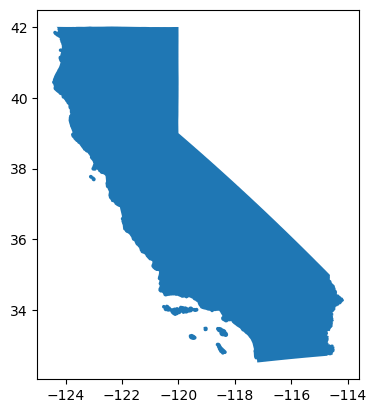

In [4]:
# CA shapefile from the link 
ca = gpd.read_file("https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b/download/ca-state-boundary.zip")

##change the CRS to local system
ca = ca.to_crs("4326")
ca.plot()

## Bounding box
Create a `geopands.GeoDataFrame` named `bbox` with the lulc bounding box. 

<AxesSubplot:>

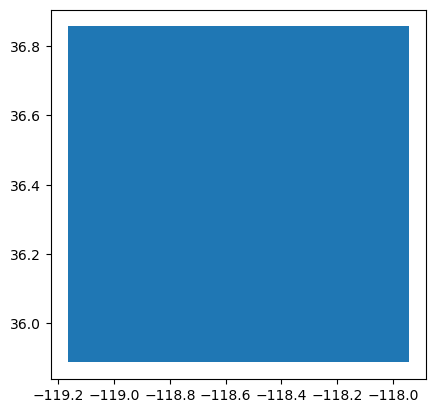

In [5]:
##squeeze the band
##Let create the point first
#points = [[x, y] for x, y in zip(np.array(lulc['x']), np.array(lulc['y']))]
#points
# bbox = gpd.GeoDataFrame(geometry=[Polygon(points)], crs = 'EPSG:4326')    
# bbox.plot(color = "blue")

##using another method
#bbox_duplicate = gpd.GeoDataFrame(geometry = lulc)
from shapely.geometry import box

# Get the spatial extent
four_corners = lulc.rio.bounds()

# Create a bounding box geometry
bbox = box(four_corners[0], four_corners[1], four_corners[2], four_corners[3])

# Create a GeoDataFrame with the bounding box geometry
bbox = gpd.GeoDataFrame(geometry=[bbox], crs=lulc.rio.crs)

# Print the GeoDataFrame
bbox.plot()

## Mount Whitney point
Create a `geopands.GeoDataFrame` named `mt_whitney` having the coordinates of Mount Whitney as a single point. You will need to look up Mount Whitney's coordinates. HINT: [`shapely.Point()`](https://shapely.readthedocs.io/en/stable/reference/shapely.Point.html)

In [6]:
# your code here
#points for mt.whitney
points = [[
            -118.50281779614944,
            36.43360285745764
          ],
          [
            -118.28329089019617,
            36.70565730462087
          ],
          [
            -117.95798369376611,
            36.44071397807059
          ],
          [
            -118.50297179600572,
            36.43046331863859
          ]]

mt_whitney = gpd.GeoDataFrame(geometry = [Polygon(points)], crs = 'epsg:4326')


## Updates
If there are any updates needed to the data, perform them in the next cells (you may add as many as you need). 
At the top of each one, include a comment explaining what is happening in that cell's code.

In [7]:
#### your code here
#I updated all required things in previous chunks, like changing to Local CRS

## Map

Create a map showing `bbox`, `ca` and `mt_whitney` similar to the one in the overview section. 
It must have at least the customizations shown in the sample map. 

HINTS:
1. to change the `marker_style`: https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html
2. to add the marker to the legend: https://matplotlib.org/stable/users/explain/axes/legend_guide.html and update parameter `linestyle='None'` in `mlines.Line2D`

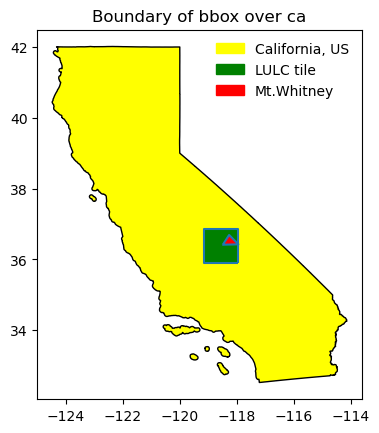

In [12]:
# plot aoi outline and RGB raster together
# Plot the geometries from ca
ax = ca.plot(edgecolor='black', facecolor='yellow')
ca_patch = mpatches.Patch(color = 'yellow',
                          label = 'California, US')

# Overlay the bbox boundary on the same plot
bbox.boundary.plot(ax=ax, facecolor = 'green')
bbox_patch = mpatches.Patch(color  = "green",
                            label = 'LULC tile')

mt_whitney.boundary.plot(ax = ax, facecolor = "red")
mt_patch = mpatches.Patch(color = "red",
                          label = "Mt.Whitney")

# Set plot title and show the plot
plt.title("Boundary of bbox over ca")
ax.legend(handles = [ca_patch, bbox_patch, mt_patch], frameon=False, loc='upper right')

plt.show()

## Final code
Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the graph you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.
